In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import nbinom

# Configuración de la semilla para reproducibilidad
np.random.seed(42)

# Número de observaciones
n = 1000

# Variables explicativas
X1 = np.random.normal(0, 1, n)
X2 = np.random.normal(5, 2, n)

# Parámetros de la distribución binomial negativa
r = 2   # Número de éxitos
p = 0.5 # Probabilidad de éxito

# Generar la variable dependiente con una proporción de ceros añadidos
mu = np.exp(1 + 0.5 * X1 + 0.3 * X2)  # Media esperada de la distribución
size = r
prob = size / (size + mu)

# Generar los datos binomiales negativos
Y_nonzero = nbinom.rvs(size, prob, size=n)

# Introducir un exceso de ceros
zero_inflation = 0.3
Y = np.where(np.random.rand(n) < zero_inflation, 0, Y_nonzero)

# Crear el DataFrameP
data = pd.DataFrame({'Y': Y, 'X1': X1, 'X2': X2})

# Mostrar las primeras filas del DataFrame
print(data.head())


    Y        X1        X2
0   0  0.496714  7.798711
1   0 -0.138264  6.849267
2  17  0.647689  5.119261
3   8  1.523030  3.706126
4   4 -0.234153  6.396447


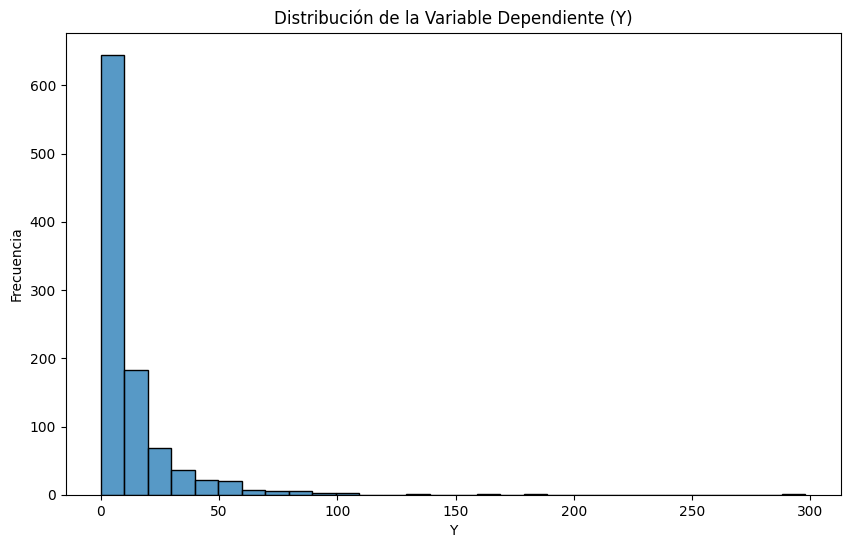

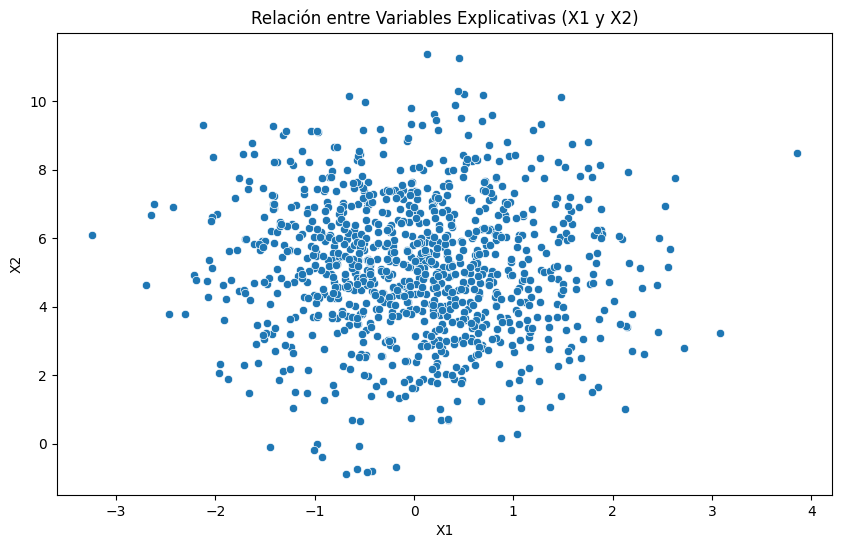

   VIF Factor features
0    0.869276    const
1    0.000632       X1
2    0.000632       X2
Proporción de ceros en Y: 31.50%


In [2]:
# Verificación de la distribución de la variable dependiente
plt.figure(figsize=(10, 6))
sns.histplot(data['Y'], bins=30, kde=False)
plt.title('Distribución de la Variable Dependiente (Y)')
plt.xlabel('Y')
plt.ylabel('Frecuencia')
plt.show()

# Verificación de la independencia de las variables explicativas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X1', y='X2', data=data)
plt.title('Relación entre Variables Explicativas (X1 y X2)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Verificación de multicolinealidad
import statsmodels.api as sm

X = data[['X1', 'X2']]
X = sm.add_constant(X)
vif = pd.DataFrame()
vif["VIF Factor"] = [sm.OLS(X[col], X.drop(columns=col)).fit().rsquared_adj for col in X]
vif["features"] = X.columns
print(vif)

# Proporción de ceros en la variable dependiente
zero_proportion = (data['Y'] == 0).mean()
print(f'Proporción de ceros en Y: {zero_proportion:.2%}')


In [3]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcular el VIF para cada variable
vif = pd.DataFrame()
vif["features"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

  features  VIF Factor
0    const    7.665011
1       X1    1.001635
2       X2    1.001635


Prueba de Shapiro-Wilk para X1: Estadístico=0.9986092190571166, p-valor=0.6272578290249117
Prueba de Shapiro-Wilk para X2: Estadístico=0.9987638229737376, p-valor=0.7311929770364404
Correlación entre X1 y Y: 0.2573737818928078
Correlación entre X2 y Y: 0.35036903703893785


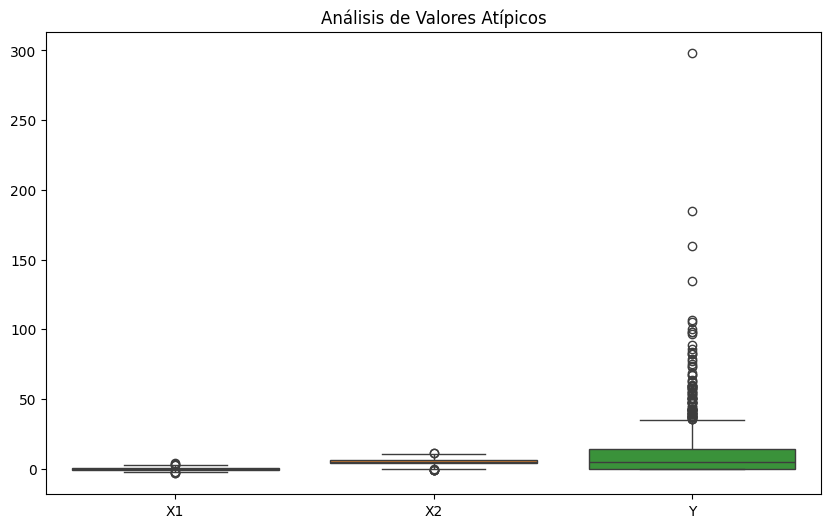

Prueba de Breusch-Pagan para heterocedasticidad: LM-Stat=66.61086624110769, p-valor=3.4326867869614746e-15


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import nbinom, shapiro, pearsonr
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Prueba de normalidad para las variables explicativas
shapiro_X1 = shapiro(data['X1'])
shapiro_X2 = shapiro(data['X2'])
print(f'Prueba de Shapiro-Wilk para X1: Estadístico={shapiro_X1.statistic}, p-valor={shapiro_X1.pvalue}')
print(f'Prueba de Shapiro-Wilk para X2: Estadístico={shapiro_X2.statistic}, p-valor={shapiro_X2.pvalue}')

# Análisis de correlación entre variables explicativas y la variable dependiente
corr_X1_Y, _ = pearsonr(data['X1'], data['Y'])
corr_X2_Y, _ = pearsonr(data['X2'], data['Y'])
print(f'Correlación entre X1 y Y: {corr_X1_Y}')
print(f'Correlación entre X2 y Y: {corr_X2_Y}')

# Análisis de valores atípicos
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['X1', 'X2', 'Y']])
plt.title('Análisis de Valores Atípicos')
plt.show()

# Prueba de heterocedasticidad
lm_test = het_breuschpagan(data['Y'], X)
print(f'Prueba de Breusch-Pagan para heterocedasticidad: LM-Stat={lm_test[0]}, p-valor={lm_test[1]}')


#AJUSTE DE HETEROCEDASTICIDAD

In [ ]:
# import statsmodels.api as sm

# # Ajustar el modelo de regresión binomial negativa con exceso de ceros
# model = sm.GLM(data['Y'], X, family=sm.families.NegativeBinomial())
# results = model.fit(cov_type='HC3')  # Utilizar errores estándar robustos

# print(results.summary())

# mejora de datos atipicos

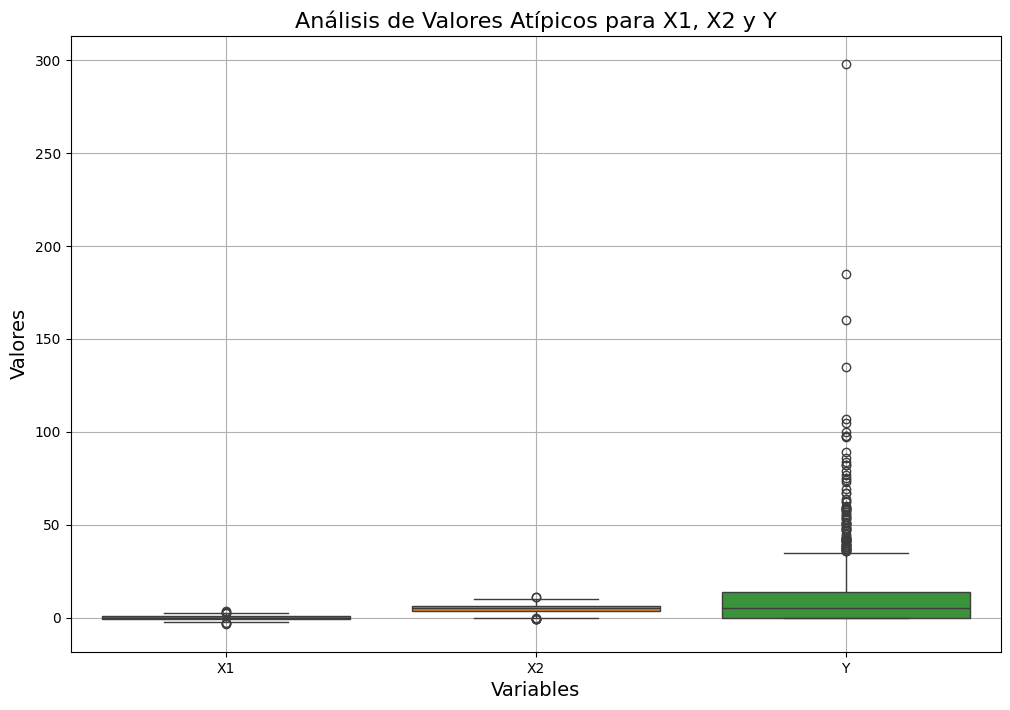

Número de valores atípicos en X1: 8
Número de valores atípicos en X2: 8
Número de valores atípicos en Y: 83
  Variable  Número de Valores Atípicos  \
0       X1                           8   
1       X2                           8   
2        Y                          83   

                  Rango de Valores Atípicos  
0  (-3.2412673400690726, 3.852731490654721)  
1  (-0.8807772693285605, 11.38621513568972)  
2                                  (0, 298)  


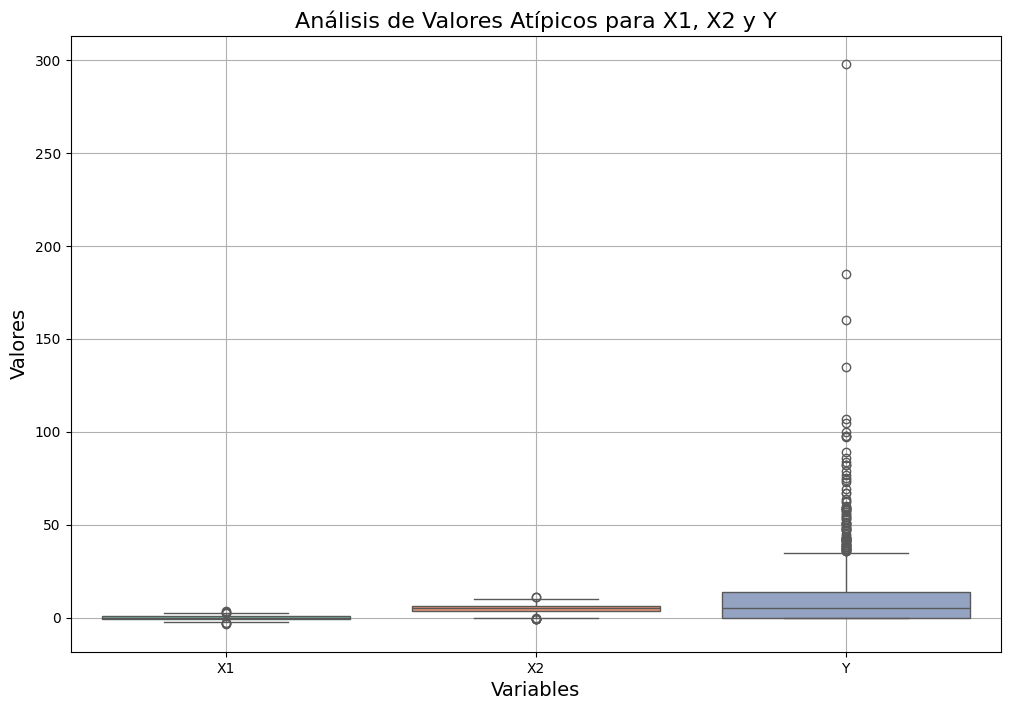

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis de valores atípicos
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[['X1', 'X2', 'Y']])
plt.title('Análisis de Valores Atípicos para X1, X2 y Y', fontsize=16)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Valores', fontsize=14)
plt.grid(True)
plt.show()

# Calcular valores atípicos para cada variable
outliers_X1 = data[(data['X1'] > data['X1'].quantile(0.75) + 1.5 * (data['X1'].quantile(0.75) - data['X1'].quantile(0.25))) |
                   (data['X1'] < data['X1'].quantile(0.25) - 1.5 * (data['X1'].quantile(0.75) - data['X1'].quantile(0.25)))]
print(f'Número de valores atípicos en X1: {len(outliers_X1)}')

outliers_X2 = data[(data['X2'] > data['X2'].quantile(0.75) + 1.5 * (data['X2'].quantile(0.75) - data['X2'].quantile(0.25))) |
                   (data['X2'] < data['X2'].quantile(0.25) - 1.5 * (data['X2'].quantile(0.75) - data['X2'].quantile(0.25)))]
print(f'Número de valores atípicos en X2: {len(outliers_X2)}')

outliers_Y = data[(data['Y'] > data['Y'].quantile(0.75) + 1.5 * (data['Y'].quantile(0.75) - data['Y'].quantile(0.25))) |
                  (data['Y'] < data['Y'].quantile(0.25) - 1.5 * (data['Y'].quantile(0.75) - data['Y'].quantile(0.25)))]
print(f'Número de valores atípicos en Y: {len(outliers_Y)}')

# Calcular los valores atípicos para cada variable
outliers_summary = {
    'Variable': ['X1', 'X2', 'Y'],
    'Número de Valores Atípicos': [len(outliers_X1), len(outliers_X2), len(outliers_Y)],
    'Rango de Valores Atípicos': [
        f'({data["X1"].min()}, {data["X1"].max()})',
        f'({data["X2"].min()}, {data["X2"].max()})',
        f'({data["Y"].min()}, {data["Y"].max()})'
    ]
}

outliers_df = pd.DataFrame(outliers_summary)
print(outliers_df)

import matplotlib.pyplot as plt
import seaborn as sns

# Definir el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el boxplot
sns.boxplot(data=data[['X1', 'X2', 'Y']], showfliers=True, palette='Set2')

# Configurar el título y las etiquetas
plt.title('Análisis de Valores Atípicos para X1, X2 y Y', fontsize=16)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Valores', fontsize=14)
plt.grid(True)

# Mostrar el gráfico
plt.show()

<Figure size 1000x600 with 0 Axes>

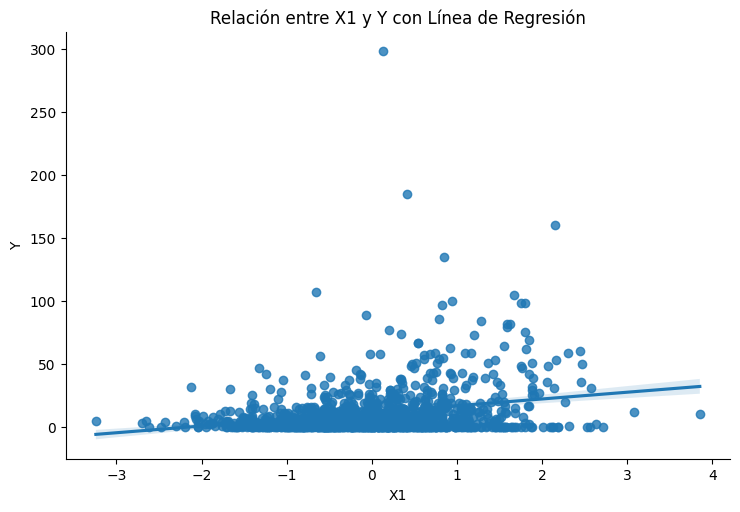

<Figure size 1000x600 with 0 Axes>

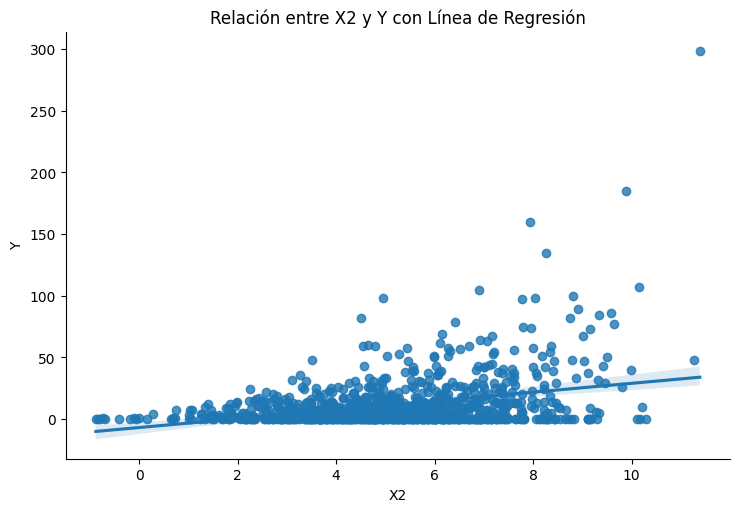

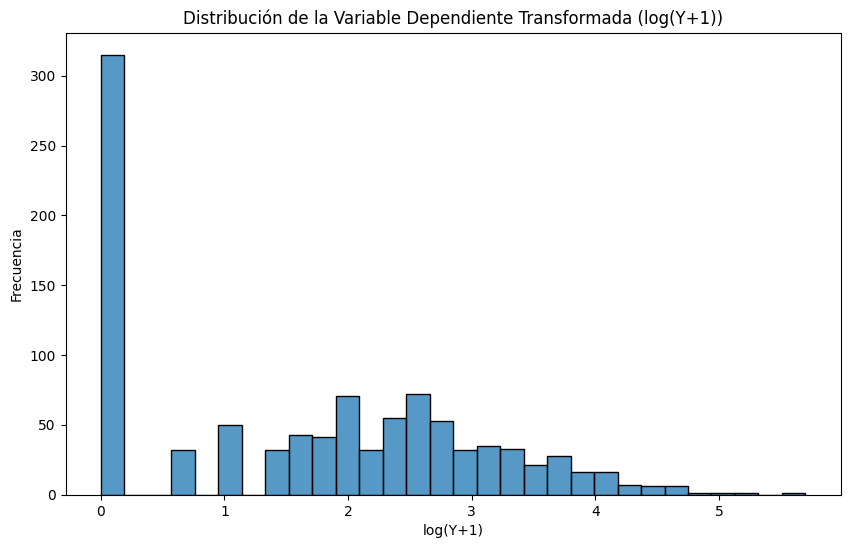

Dispersión de Y: 35.814657354716324


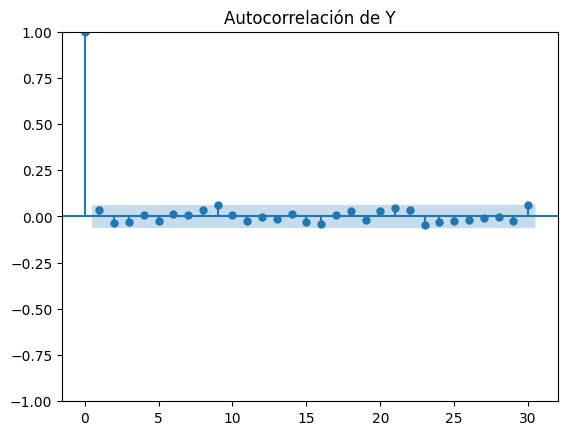

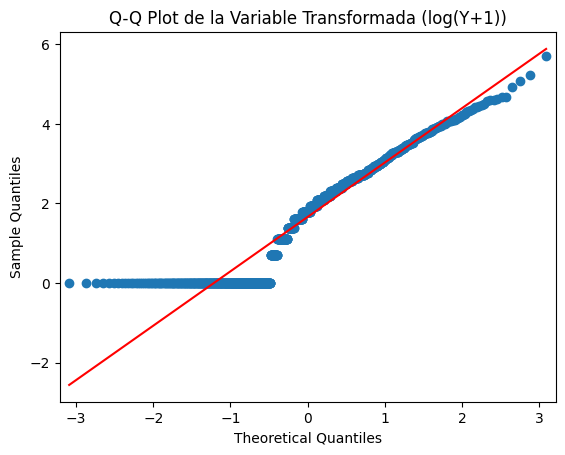

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import nbinom, shapiro, pearsonr, boxcox
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.graphics.gofplots import qqplot
from statsmodels.graphics.tsaplots import plot_acf

# # Análisis de varianza (ANOVA) entre grupos de la variable dependiente
# data['Y_group'] = pd.qcut(data['Y'], q=4, duplicates='drop')
# anova_results = sm.stats.anova_lm(sm.OLS(data['Y'], sm.add_constant(pd.get_dummies(data['Y_group']))).fit())
# print('Resultados de ANOVA:')
# print(anova_results)

# Visualización de la relación entre variables explicativas y la variable dependiente
plt.figure(figsize=(10, 6))
sns.lmplot(x='X1', y='Y', data=data, aspect=1.5)
plt.title('Relación entre X1 y Y con Línea de Regresión')
plt.show()

plt.figure(figsize=(10, 6))
sns.lmplot(x='X2', y='Y', data=data, aspect=1.5)
plt.title('Relación entre X2 y Y con Línea de Regresión')
plt.show()

# Transformaciones de variables
data['log_Y'] = np.log1p(data['Y'])  # log(1 + Y) para manejar ceros
plt.figure(figsize=(10, 6))
sns.histplot(data['log_Y'], bins=30, kde=False)
plt.title('Distribución de la Variable Dependiente Transformada (log(Y+1))')
plt.xlabel('log(Y+1)')
plt.ylabel('Frecuencia')
plt.show()

# Cálculo de la dispersión
dispersion = np.var(data['Y']) / np.mean(data['Y'])
print(f'Dispersión de Y: {dispersion}')

# Análisis de autocorrelación
plot_acf(data['Y'])
plt.title('Autocorrelación de Y')
plt.show()

# Q-Q plot para normalidad de la variable transformada
qqplot(data['log_Y'], line='s')
plt.title('Q-Q Plot de la Variable Transformada (log(Y+1))')
plt.show()

#CODIGO PARA PRESENTAR EN LA TESIS:

In [5]:
    # Verificación de valores faltantes
missing_values = data.isnull().sum()
print('Valores faltantes en cada columna:')
print(missing_values)


Valores faltantes en cada columna:
Y        0
X1       0
X2       0
log_Y    0
dtype: int64


Asegurarse de que no haya valores faltantes en las variables de interés.

In [6]:
# Confirmar que la varianza es mayor que la media
mean_Y = np.mean(data['Y'])
var_Y = np.var(data['Y'])
print(f'Media de Y: {mean_Y}')
print(f'Varianza de Y: {var_Y}')
if var_Y > mean_Y:
    print('La varianza es mayor que la media, se cumple el supuesto para la regresión binomial negativa.')
else:
    print('Advertencia: La varianza no es mayor que la media, puede que la regresión binomial negativa no sea adecuada.')


Media de Y: 11.598
Varianza de Y: 415.37839599999995
La varianza es mayor que la media, se cumple el supuesto para la regresión binomial negativa.


Confirmar que la varianza es mayor que la media en la variable dependiente.

c:\Users\acayllahu\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


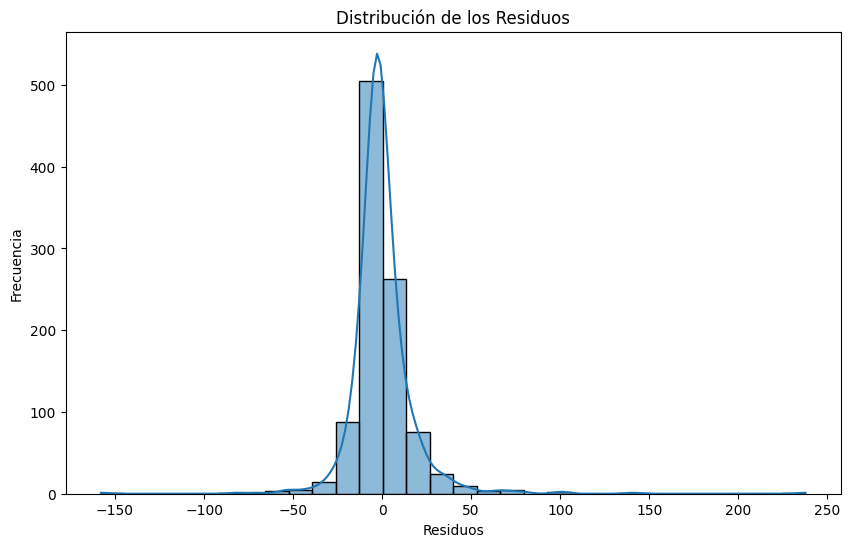

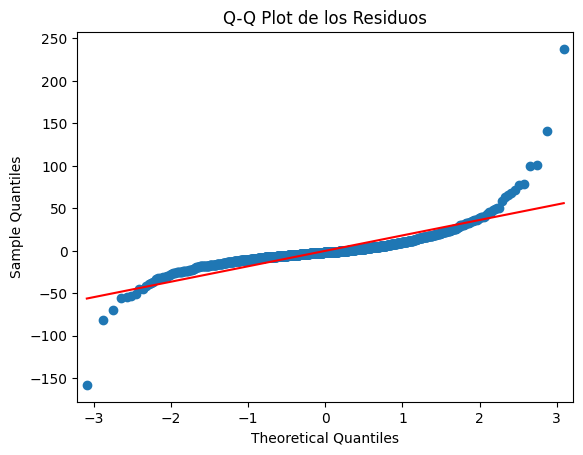

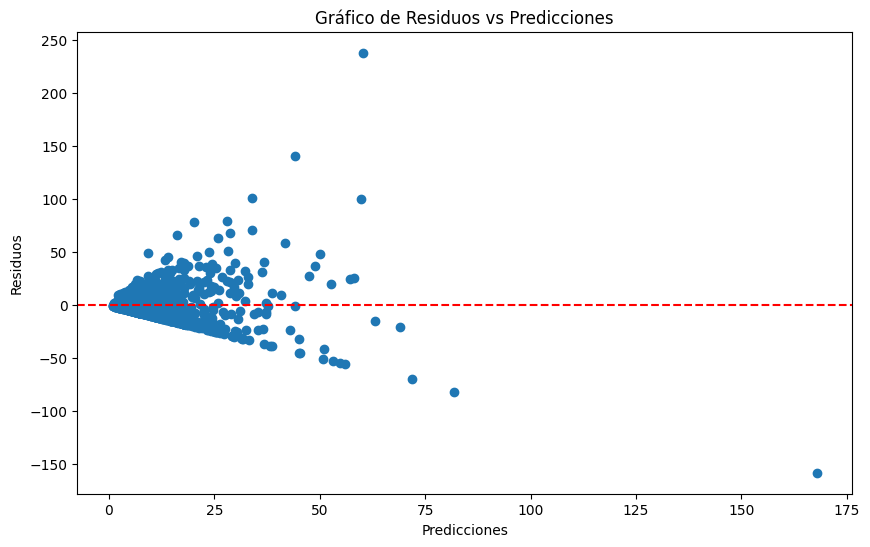

In [7]:
# Ajustar un modelo binomial negativo para obtener los residuos
import statsmodels.formula.api as smf

# Ajustar el modelo binomial negativo
model = smf.glm('Y ~ X1 + X2', data=data, family=sm.families.NegativeBinomial()).fit()
residuals = model.resid_response

# Gráfico de los residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribución de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()

# Q-Q plot de los residuos
qqplot(residuals, line='s')
plt.title('Q-Q Plot de los Residuos')
plt.show()

# Gráfico de residuos vs predicciones
predictions = model.fittedvalues
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Gráfico de Residuos vs Predicciones')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.show()


Visualizar la distribución de los residuos y realizar un Q-Q plot para evaluar la normalidad de los residuos.
Gráfico de residuos vs predicciones para verificar si hay patrones en los residuos.

In [8]:
dir(sm.OLS)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_kwargs',
 '_fit_collinear',
 '_fit_ridge',
 '_fit_zeros',
 '_formula_max_endog',
 '_get_init_kwds',
 '_handle_data',
 '_kwargs_allowed',
 '_setup_score_hess',
 '_sqrt_lasso',
 'df_model',
 'df_resid',
 'endog_names',
 'exog_names',
 'fit',
 'fit_regularized',
 'from_formula',
 'get_distribution',
 'hessian',
 'hessian_factor',
 'information',
 'initialize',
 'loglike',
 'predict',
 'score',
 'whiten']

In [12]:
import numpy as np
import pandas as pd
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.discrete.count_model import ZeroInflatedNegativeBinomialP

# Supongamos que tienes un DataFrame llamado data
# data = pd.DataFrame(...)

# Definir la fórmula del modelo con términos lineales
formula_linear = 'Y ~ X1 + X2'

# Preparar los datos usando dmatrices de patsy
y_linear, X_linear = dmatrices(formula_linear, data, return_type='dataframe')

# Ajustar el modelo de regresión binomial negativa con excesos de ceros y varianza lineal
model_linear = ZeroInflatedNegativeBinomialP(y_linear, X_linear, p=1)  # p=1 indica que todos los excesos son por ceros

# Ajustar el modelo lineal
result_linear = model_linear.fit()

# Resumen del modelo lineal
print("Modelo con varianza lineal:")
print(result_linear.summary())



Optimization terminated successfully.
         Current function value: 3.069845
         Iterations: 31
         Function evaluations: 35
         Gradient evaluations: 35
Modelo con varianza lineal:
                     ZeroInflatedNegativeBinomialP Regression Results                    
Dep. Variable:                                 Y   No. Observations:                 1000
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                      997
Method:                                      MLE   Df Model:                            2
Date:                           Thu, 27 Jun 2024   Pseudo R-squ.:                 0.04628
Time:                                   10:46:46   Log-Likelihood:                -3069.8
converged:                                  True   LL-Null:                       -3218.8
Covariance Type:                       nonrobust   LLR p-value:                 2.050e-65
                    coef    std err          z      P>|z|      [0.025      0.975

## Resumen del Modelo

- **Dep. Variable:** Y
- **No. Observations:** 1000
- **Model:** ZeroInflatedNegativeBinomialP
- **Method:** MLE (Maximum Likelihood Estimation)
- **Date:** Thu, 27 Jun 2024
- **Time:** 10:46:46
- **Converged:** True (Indica que la optimización convergió correctamente)
- **Covariance Type:** nonrobust (Tipo de covarianza: no robusta)

### Coeficientes Estimados

| Variable      | Coeficiente | Error estándar | p-valor   | Interpretación                                              |
|---------------|-------------|----------------|-----------|-------------------------------------------------------------|
| inflate_const | -1.0136     | 0.082          | p < 0.001 | Intercepto del componente de inflación (exceso de ceros)    |
| Intercept     | 1.3222      | 0.097          | p < 0.001 | Intercepto del modelo de regresión binomial negativa        |
| X1            | 0.3423      | 0.026          | p < 0.001 | Coeficiente para la variable explicativa X1                  |
| X2            | 0.2484      | 0.015          | p < 0.001 | Coeficiente para la variable explicativa X2                  |
| alpha         | 10.0211     | 0.724          | p < 0.001 | Parámetro de sobre-dispersión (alpha)                       |

### Interpretación General

- Pseudo R-squared: 0.04628
- Log-Likelihood: -3069.8
- LL-Null: -3218.8
- LLR p-value: 2.050e-65

Estos resultados indican que tanto las variables explicativas lineales (X1, X2) como el componente de inflación (exceso de ceros) y el parámetro de sobre-dispersión (alpha) son estadísticamente significativos en este modelo. La interpretación detallada de los coeficientes te permite entender cómo cada variable afecta la probabilidad de observar eventos y ceros en tus datos.

Si tienes alguna pregunta adicional o deseas explorar algún aspecto específico de los resultados, ¡estaré aquí para ayudarte!
### Interpretación de la Significancia

- **inflate_const:** p < 0.001
  - El intercepto del componente de inflación (exceso de ceros) es significativo. Un valor negativo indica que hay una reducción significativa en la probabilidad de tener ceros observados en comparación con el modelo nulo.

- **Intercept:** p < 0.001
  - El intercepto del modelo de regresión binomial negativa es significativo. Representa el logaritmo del número esperado de eventos para los valores de las variables explicativas X1 y X2 iguales a cero.

- **X1:** p < 0.001
  - La variable explicativa X1 es significativa. Indica cómo cambia el logaritmo del número esperado de eventos cuando X1 aumenta en una unidad, manteniendo las demás variables constantes.

- **X2:** p < 0.001
  - La variable explicativa X2 es significativa. Similar a X1, muestra el efecto de X2 en el logaritmo del número esperado de eventos.

- **alpha:** p < 0.001
  - El parámetro de sobre-dispersión (alpha) también es significativo. Captura la variabilidad adicional no explicada por el modelo. Un valor alto de alpha sugiere una sobre-dispersión significativa en los datos.

En resumen, según los valores p proporcionados en el resumen del modelo, todas las variables (inflate_const, Intercept, X1, X2, alpha) son estadísticamente significativas. Esto significa que todas estas variables tienen un impacto significativo en el modelo y son importantes para explicar la variabilidad en los datos observados.

Si tienes más preguntas o necesitas más detalles sobre algún aspecto específico del modelo, no dudes en preguntar. Estoy aquí para ayudarte a entender mejor tus resultados.


In [13]:
# Definir la fórmula del modelo con términos cuadráticos
formula_quad = 'Y ~ np.power(X1, 2) + np.power(X2, 2)'

# Preparar los datos usando dmatrices de patsy
y_quad, X_quad = dmatrices(formula_quad, data, return_type='dataframe')

# Ajustar el modelo de regresión binomial negativa con excesos de ceros y varianza cuadrática
model_quad = ZeroInflatedNegativeBinomialP(y_quad, X_quad, p=1)  # p=1 indica que todos los excesos son por ceros

# Ajustar el modelo cuadrático
result_quad = model_quad.fit()

# Resumen del modelo cuadrático
print("Modelo con varianza cuadrática:")
print(result_quad.summary())


Optimization terminated successfully.
         Current function value: 3.135820
         Iterations: 30
         Function evaluations: 36
         Gradient evaluations: 36
Modelo con varianza cuadrática:
                     ZeroInflatedNegativeBinomialP Regression Results                    
Dep. Variable:                                 Y   No. Observations:                 1000
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                      997
Method:                                      MLE   Df Model:                            2
Date:                           Thu, 27 Jun 2024   Pseudo R-squ.:                 0.02578
Time:                                   10:46:55   Log-Likelihood:                -3135.8
converged:                                  True   LL-Null:                       -3218.8
Covariance Type:                       nonrobust   LLR p-value:                 9.204e-37
                      coef    std err          z      P>|z|      [0.025     

#terminos lineales y cuadraticos

In [14]:
import numpy as np
import pandas as pd
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.discrete.count_model import ZeroInflatedNegativeBinomialP

# Supongamos que tienes un DataFrame llamado data
# data = pd.DataFrame(...)

# Definir la fórmula del modelo con términos lineales y cuadráticos
formula = 'Y ~ X1 + np.power(X1, 2) + X2 + np.power(X2, 2)'

# Preparar los datos usando dmatrices de patsy
y, X = dmatrices(formula, data, return_type='dataframe')

# Ajustar el modelo de regresión binomial negativa con excesos de ceros y varianza lineal y cuadrática
model = ZeroInflatedNegativeBinomialP(y, X, p=1)  # p=1 indica que todos los excesos son por ceros

# Ajustar el modelo
result = model.fit()

# Resumen del modelo
print(result.summary())


         Current function value: 3.060531
         Iterations: 35
         Function evaluations: 41
         Gradient evaluations: 41
                     ZeroInflatedNegativeBinomialP Regression Results                    
Dep. Variable:                                 Y   No. Observations:                 1000
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                      995
Method:                                      MLE   Df Model:                            4
Date:                           Thu, 27 Jun 2024   Pseudo R-squ.:                 0.04917
Time:                                   10:52:08   Log-Likelihood:                -3060.5
converged:                                 False   LL-Null:                       -3218.8
Covariance Type:                       nonrobust   LLR p-value:                 2.942e-67
                      coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

c:\Users\acayllahu\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_optimize.py:1291: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
c:\Users\acayllahu\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#manejando la sobredispersion

In [15]:
import numpy as np
import pandas as pd
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.discrete.count_model import ZeroInflatedNegativeBinomialP

# Supongamos que tienes un DataFrame llamado data
# data = pd.DataFrame(...)

# Definir la fórmula del modelo con términos lineales y cuadráticos
formula = 'Y ~ X1 + np.power(X1, 2) + X2 + np.power(X2, 2)'

# Preparar los datos usando dmatrices de patsy
y, X = dmatrices(formula, data, return_type='dataframe')

# Ajustar el modelo de regresión binomial negativa con excesos de ceros, varianza lineal y cuadrática,
# y parámetro de sobre-dispersión
model = ZeroInflatedNegativeBinomialP(y, X, p=1)  # p=1 indica que todos los excesos son por ceros

# Ajustar el modelo
result = model.fit()

# Resumen del modelo
print(result.summary())


         Current function value: 3.060531
         Iterations: 35
         Function evaluations: 41
         Gradient evaluations: 41
                     ZeroInflatedNegativeBinomialP Regression Results                    
Dep. Variable:                                 Y   No. Observations:                 1000
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                      995
Method:                                      MLE   Df Model:                            4
Date:                           Thu, 27 Jun 2024   Pseudo R-squ.:                 0.04917
Time:                                   10:53:17   Log-Likelihood:                -3060.5
converged:                                 False   LL-Null:                       -3218.8
Covariance Type:                       nonrobust   LLR p-value:                 2.942e-67
                      coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

c:\Users\acayllahu\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_optimize.py:1291: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
c:\Users\acayllahu\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# desde aqui es la validacion de l modelo


Estadísticas de ajuste:
Pseudo R-squared: 0.04628
Log-Likelihood: -3069.84548
LL-Null: -3218.79585
LLR p-value: 0.00000

Significancia de los coeficientes:
inflate_const    2.132244e-35
Intercept        2.415210e-42
X1               3.534931e-39
X2               5.865251e-62
alpha            1.333163e-43
dtype: float64


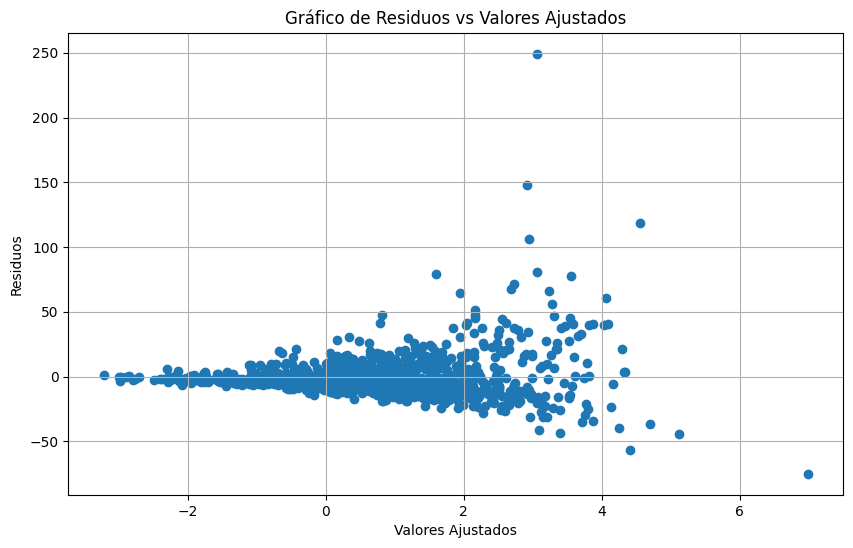

Optimization terminated successfully.
         Current function value: 3.065841
         Iterations: 30
         Function evaluations: 33
         Gradient evaluations: 33

Resultados en conjunto de entrenamiento:
                     ZeroInflatedNegativeBinomialP Regression Results                    
Dep. Variable:                                 Y   No. Observations:                  800
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                      797
Method:                                      MLE   Df Model:                            2
Date:                           Thu, 27 Jun 2024   Pseudo R-squ.:                 0.05150
Time:                                   11:27:26   Log-Likelihood:                -2452.7
converged:                                  True   LL-Null:                       -2585.8
Covariance Type:                       nonrobust   LLR p-value:                 1.467e-58
                    coef    std err          z      P>|z|      [0.

In [18]:
# Importar módulos necesarios
import numpy as np
import pandas as pd
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.discrete.count_model import ZeroInflatedNegativeBinomialP

# 1. Estadísticas de ajuste
print("\nEstadísticas de ajuste:")
print(f"Pseudo R-squared: {result_linear.prsquared:.5f}")
print(f"Log-Likelihood: {result_linear.llf:.5f}")
print(f"LL-Null: {result_linear.llnull:.5f}")
print(f"LLR p-value: {result_linear.llr_pvalue:.5f}")

# 2. Significancia de los coeficientes
print("\nSignificancia de los coeficientes:")
print(result_linear.pvalues[result_linear.pvalues < 0.05])

# 3. Diagnóstico de residuos (ejemplo: gráfico de residuos vs ajustados)
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(result_linear.fittedvalues, result_linear.resid)
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs Valores Ajustados")
plt.grid(True)
plt.show()

# 4. Validación cruzada (ejemplo: división de datos y ajuste en conjunto de entrenamiento)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

model_train = ZeroInflatedNegativeBinomialP(y_train, X_train, p=1)
result_train = model_train.fit()

print("\nResultados en conjunto de entrenamiento:")
print(result_train.summary())

# Evaluación en conjunto de prueba
predictions_test = result_train.predict(X_test)
from sklearn.metrics import mean_squared_error

mse_test = mean_squared_error(y_test, predictions_test)
print(f"\nError cuadrático medio en conjunto de prueba: {mse_test:.5f}")

#esto podria estar aplicado ala data resultfinal no ala de train que es la anterior

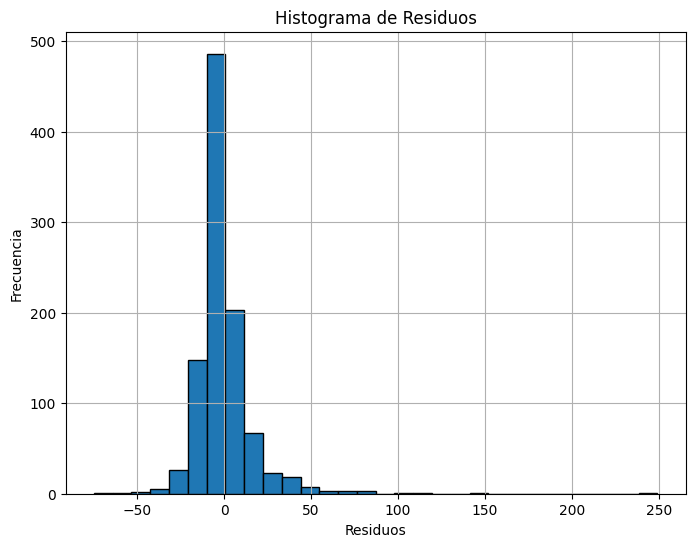

In [19]:
plt.figure(figsize=(8, 6))
plt.hist(result_linear.resid, bins=30, edgecolor='black')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.grid(True)
plt.show()


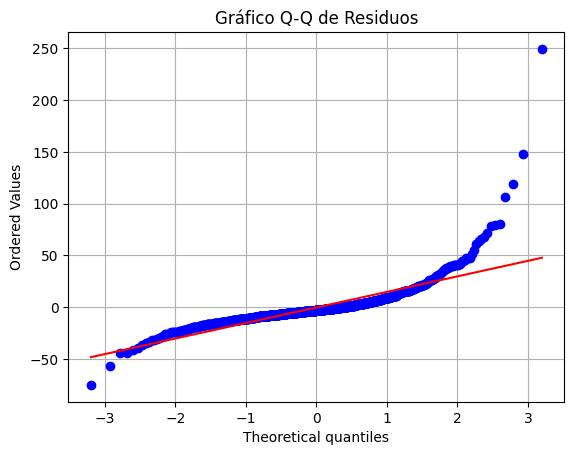

In [20]:
import scipy.stats as stats

stats.probplot(result_linear.resid, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de Residuos')
plt.grid(True)
plt.show()


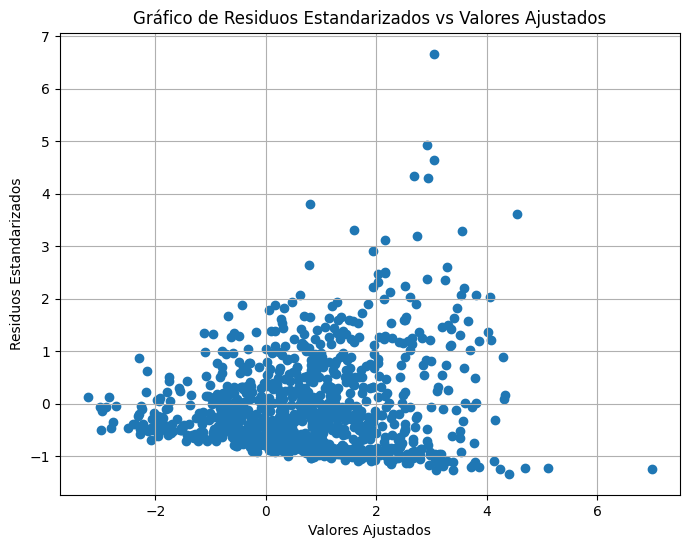

In [21]:
standardized_resid = result_linear.resid_pearson
plt.figure(figsize=(8, 6))
plt.scatter(result_linear.fittedvalues, standardized_resid)
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos Estandarizados')
plt.title('Gráfico de Residuos Estandarizados vs Valores Ajustados')
plt.grid(True)
plt.show()


Análisis de Influencia y Valores Atípicos:

In [29]:
# # Calcular los residuos estandarizados
# standardized_resid = result_linear.resid_pearson

# # Calcular leverage y Cook's distance (si es posible)
# try:
#     influence = result_linear.get_influence()
#     leverage = influence.hat_matrix_diag
#     cook_distance = influence.cooks_distance[0]

#     # Verificar las longitudes
#     if len(leverage) == len(standardized_resid):
#         # Graficar Residuos Estandarizados vs Leverage
#         plt.figure(figsize=(10, 6))
#         plt.scatter(leverage, standardized_resid, edgecolors='k', alpha=0.5)
#         plt.xlabel('Leverage')
#         plt.ylabel('Residuos Estandarizados')
#         plt.title('Gráfico de Residuos Estandarizados vs Leverage')
#         plt.grid(True)
#         plt.show()
#     else:
#         print("Los tamaños de leverage y standardized_resid no son iguales.")

#     if len(cook_distance) == len(standardized_resid):
#         # Graficar Residuos Estandarizados vs Cook's Distance
#         plt.figure(figsize=(10, 6))
#         plt.scatter(cook_distance, standardized_resid, edgecolors='k', alpha=0.5)
#         plt.xlabel('Cook\'s Distance')
#         plt.ylabel('Residuos Estandarizados')
#         plt.title('Gráfico de Residuos Estandarizados vs Cook\'s Distance')
#         plt.grid(True)
#         plt.show()
#     else:
#         print("Los tamaños de cook_distance y standardized_resid no son iguales.")

# except AttributeError:
#     print("El modelo no soporta los métodos de influencia (leverage y Cook's distance) directamente.")





Validación Cruzada:

In [30]:
# from sklearn.model_selection import cross_val_score

# model = ZeroInflatedNegativeBinomialP(y_linear, X_linear, p=1)
# cv_scores = cross_val_score(model, X_linear, y_linear, cv=5, scoring='neg_mean_squared_error')
# print(f"\nError cuadrático medio promedio en validación cruzada (5-fold): {np.mean(-cv_scores):.5f}")


Evaluacion de un modelo de regresion binomial negativa con exceso de zeros

In [31]:
print(result_linear.summary())

                     ZeroInflatedNegativeBinomialP Regression Results                    
Dep. Variable:                                 Y   No. Observations:                 1000
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                      997
Method:                                      MLE   Df Model:                            2
Date:                           Thu, 27 Jun 2024   Pseudo R-squ.:                 0.04628
Time:                                   11:37:21   Log-Likelihood:                -3069.8
converged:                                  True   LL-Null:                       -3218.8
Covariance Type:                       nonrobust   LLR p-value:                 2.050e-65
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
inflate_const    -1.0136      0.082    -12.416      0.000      -1.174      -0.854
Intercept         1.3222      0.09

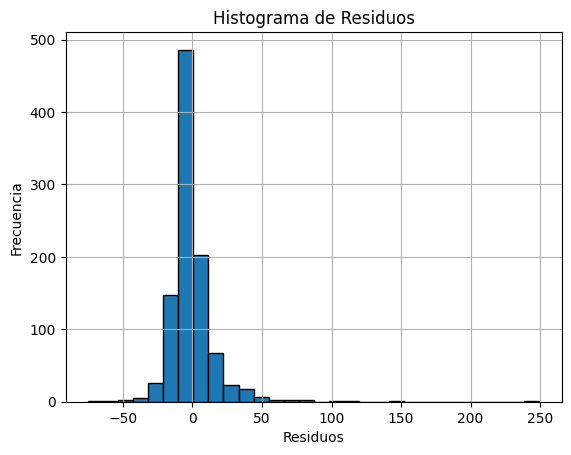

In [32]:
plt.hist(result_linear.resid, bins=30, edgecolor='black')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.grid(True)
plt.show()

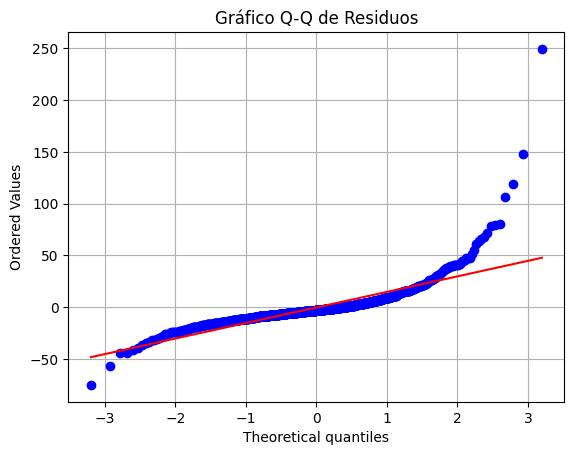

In [33]:
import scipy.stats as stats

stats.probplot(result_linear.resid, dist="norm", plot=plt)
plt.title('Gráfico Q-Q de Residuos')
plt.grid(True)
plt.show()

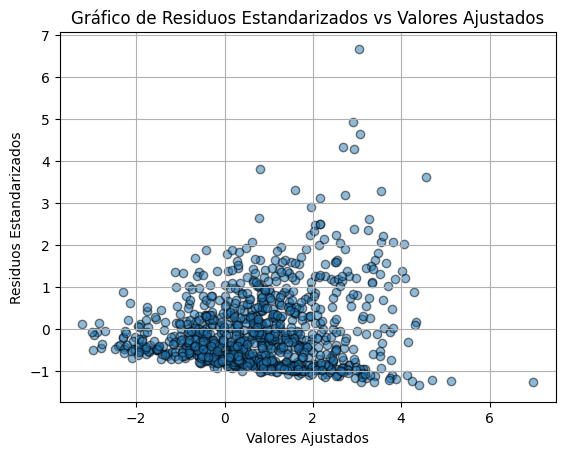

In [34]:
standardized_resid = result_linear.resid_pearson
plt.scatter(result_linear.fittedvalues, standardized_resid, edgecolors='k', alpha=0.5)
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos Estandarizados')
plt.title('Gráfico de Residuos Estandarizados vs Valores Ajustados')
plt.grid(True)
plt.show()

In [48]:
   #  Análisis de Influencia y Valores Atípicos esto falta hay que corregir
   

In [38]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Definir el número de folds para la validación cruzada
n_splits = 5
kf = KFold(n_splits=n_splits)

# Listas para almacenar los errores cuadráticos medios en cada fold
cv_scores = []

# Iterar sobre los folds
for train_index, test_index in kf.split(X_linear):
    X_train, X_test = X_linear.iloc[train_index], X_linear.iloc[test_index]
    y_train, y_test = y_linear.iloc[train_index], y_linear.iloc[test_index]
    
    # Ajustar el modelo en el conjunto de entrenamiento
    model = ZeroInflatedNegativeBinomialP(y_train, X_train, p=1)
    result = model.fit()
    
    # Predecir en el conjunto de prueba
    y_pred = result.predict(X_test)
    
    # Calcular el error cuadrático medio en el conjunto de prueba
    mse = mean_squared_error(y_test, y_pred)
    cv_scores.append(mse)

# Calcular el error cuadrático medio promedio en validación cruzada
avg_cv_mse = np.mean(cv_scores)
print(f"Error cuadrático medio promedio en validación cruzada (5-fold): {avg_cv_mse:.5f}")



Optimization terminated successfully.
         Current function value: 3.051322
         Iterations: 31
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 3.025629
         Iterations: 30
         Function evaluations: 33
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 3.107407
         Iterations: 28
         Function evaluations: 32
         Gradient evaluations: 32
Optimization terminated successfully.
         Current function value: 3.075656
         Iterations: 27
         Function evaluations: 30
         Gradient evaluations: 30
Optimization terminated successfully.
         Current function value: 3.082556
         Iterations: 29
         Function evaluations: 32
         Gradient evaluations: 32
Error cuadrático medio promedio en validación cruzada (5-fold): 325.57992
